<a href="https://colab.research.google.com/github/Diz138/YelpReviews/blob/main/NLPEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [20]:
#!pip3 install pickle5
import pickle5 as pickle
import pickle as pkl
import pandas as pd
#Matts directories
#business = pd.read_csv("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_filtered_business.csv")
#filtered_review = pd.read_csv("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_filtered_review.csv")
#review = pd.read_csv("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_review.csv")

with open("/content/drive/MyDrive/WPI/Senior Year/NLP/CS525/yelp_merged.pkl", "rb") as f:
    apkl = pickle.load(f)
    
df = pd.DataFrame(apkl)

In [4]:
df.head()

,business_id,stars,review_count,tips,dates,reviews
0,MTSW4McQd7CbVtyjqoe9mw,4.0,80,"[Love their pastries and drinks!, Really good ...","[2010-08-18 17:05:36, 2010-11-25 17:45:31, 201...",[This is nice little Chinese bakery in the hea...
1,0bPLkL0QhhPO5kt1_EXmNQ,4.5,100,[Always a pleasant experience. The food is fre...,"[2010-08-26 17:52:51, 2011-02-13 00:43:54, 201...",[The worst Chicken Parm. Sandwich I've ever ea...
2,MUTTqe8uqyMdBl186RmNeA,4.0,245,"[Get the shrimp toast!, Soft opening now.\n\nh...","[2017-11-25 02:28:19, 2017-11-28 23:17:19, 201...",[Stopped in to check out this new spot around ...
3,ROeacJQwBeh05Rqg7F6TCg,4.5,205,"[They're open on Sunday's until 9 pm!, Small p...","[2013-12-06 22:32:24, 2013-12-18 02:03:03, 201...","[This place is fantastic! Delicious, simple, ..."
4,9OG5YkX1g2GReZM0AskizA,2.5,339,"[Yummy eggplant quadratini!, Lunch with a pet ...","[2010-11-11 14:05:01, 2010-12-31 20:24:03, 201...",[Great bar Happy Hour 4-7 every day. Wine & Dr...


## 0. Eploratory Data Analysis

In [ ]:
#Retrieving Data shape and output
print(filtered_review.shape)
filtered_review.head()

(5066392, 10)


,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1.0,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
4,6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5.0,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18


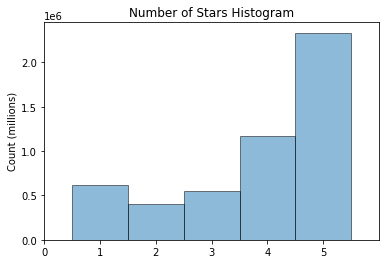

In [ ]:
#Histogram of all reviews showing the count of stars
bins = np.arange(7) -0.5
plt.hist(filtered_review.stars, bins, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count (millions)')
plt.title('Number of Stars Histogram')
plt.xticks(range(6))
plt.xlim([0, 6])

plt.show()

[  0   2   5   1   3   4  12   6   9   7  11  26  10   8  25  18  15  13
  21  16  14  24  17  22  20  38  19  27  23  32  28  39  33  40  44  30
  42  34  29  37  88  35  48  43  54  45  68  46  67  65  62 113  61  57
  31  47  53  75 141  36 105  78  52  58  74 133  76  93  71 254  63  49
  83  86  81  59  55  92  41 101 103  97 129 130  82  56 107  60  94 114
  79 139  73 169 251 200  85  64 222 143 181 179 190 175 277 126 127 167
 135 256 146 112  77 152 144 235  95 228 240  84  99 232  89 106 202 236
 116  51  72  87  66 134 283  50  69 191 117  -1  91 104 157  90  80 102
 155  70 100 159 150 201 121  98 119 227 110  96 266 324 154 148 180 361
 241 326 310 287 109 278 332 182 307 336 342 345 341 147 188 164 375 351
 137 369 357 313 346 344 378 347 353 333 370 118 158 792 177 288]


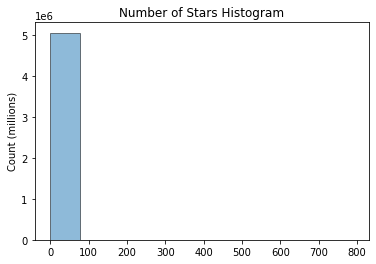

In [ ]:
print(filtered_review.funny.unique())
bins = np.arange(7) -0.5
#plt.hist(filtered_review.funny, bins, alpha=0.5, histtype='bar', ec='black')
plt.hist(filtered_review.funny, alpha=0.5, histtype='bar', ec='black')
plt.ylabel('Count (millions)')
plt.title('Number of Stars Histogram')
#plt.xticks(range(6))
#plt.xlim([0, 6])

plt.show()

## 1. Converting from dataframe to tensorflow dataset

####Functions

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
stop_words = set(stopwords.words("english"))
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [27]:
def text_preprocessing(s):
    """
    - Lowercase the sentence
    - Change "'t" to "not"
    - Remove "@name"
    - Isolate and remove punctuations except "?"
    - Remove other special characters
    - Remove stop words except "not" and "can"
    - Remove trailing whitespace
    """
    s =' '.join(s)
    s = s.lower()
    # Change 't to 'not'
    s = re.sub(r"\'t", " not", s)
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove stopwords except 'not' and 'can'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('english')
                  or word in ['not', 'can']])
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    return s
def sentiment(score):
  if score>=3:
    return 1
  else:
    return 0

####Finetuning

In [28]:
import tensorflow as tf
df['sentiment'] = df.stars.apply(lambda a : sentiment(a))
review_df = df[['reviews','sentiment']]
review_df = review_df.iloc[0:100,:]
review_df['reviews'] = review_df.reviews.apply(lambda a : text_preprocessing(a))
print(review_df.head())
#review_df = review_df[0:10000,:]

#ds = tf.data.Dataset.from_tensor_slices(dict(review_df))

                                             reviews  sentiment
0  nice little chinese bakery heart philadelphia ...          1
1  worst chicken parm sandwich ever eaten chicken...          1
2  stopped check new spot around corner us boyfri...          1
3  place fantastic delicious simple healthy liter...          1
4  great bar happy hour 4 7 every day wine drafts...          0


In [29]:
#review_df = review_df.iloc[0:10000,:]

ds = tf.data.Dataset.from_tensor_slices(dict(review_df))

In [7]:
print(ds)

<TensorSliceDataset element_spec={'reviews': TensorSpec(shape=(), dtype=tf.string, name=None), 'sentiment': TensorSpec(shape=(), dtype=tf.int64, name=None)}>


In [31]:
!pip install transformers
import torch
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
import random
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split

def set_seed(seed: int):
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    random.seed(seed)
    np.random.seed(seed)
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # ^^ safe to call this function even if cuda is not available
    if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)
max_length = 512
model_name = "bert-base-uncased"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 1.9 MB/s 
     |████████████████████████████████| 7.6 MB 52.8 MB/s 
     |████████████████████████████████| 182 kB 72.2 MB/s 


In [32]:
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
def readReviews(test_size=0.2):
  # download & load 20newsgroups dataset from sklearn's repos
  #dataset = fetch_20newsgroups(subset="all", shuffle=True, remove=("headers", "footers", "quotes"))
  documents = review_df.reviews
  labels = review_df.sentiment
  # split into training & testing a return data as well as label names
  return train_test_split(documents, labels, test_size=test_size) 

In [34]:
(train_texts, valid_texts, train_labels, valid_labels) = readReviews()

In [35]:
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts.tolist(), truncation=True, padding=True, max_length=max_length)

In [54]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        #print(item)
        #print(len(self.labels))
        #print(idx)
        #print("HEELOOW")
        item["labels"] = torch.tensor([self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_labels = train_labels.tolist()
valid_labels = valid_labels.tolist()
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [55]:
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to("cuda")

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.24.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/pytorch_model.bin
Some weights of the model check

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [58]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=2,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=10,   # batch size for evaluation
    warmup_steps=200,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    logging_steps=800,               # log & save weights each logging_steps
    save_steps=800,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

using `logging_steps` to initialize `eval_steps` to 800
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [59]:
trainer = Trainer(
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [60]:
trainer.train()

***** Running training *****
  Num examples = 80
  Num Epochs = 2
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 20
  Number of trainable parameters = 109483778


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=20, training_loss=0.6421642780303956, metrics={'train_runtime': 14.9688, 'train_samples_per_second': 10.689, 'train_steps_per_second': 1.336, 'total_flos': 42097768857600.0, 'train_loss': 0.6421642780303956, 'epoch': 2.0})

In [61]:
trainer.evaluate()

***** Running Evaluation *****
  Num examples = 20
  Batch size = 10


{'eval_loss': 0.2663276195526123,
 'eval_accuracy': 1.0,
 'eval_f1': 1.0,
 'eval_precision': 1.0,
 'eval_recall': 1.0,
 'eval_runtime': 0.6924,
 'eval_samples_per_second': 28.885,
 'eval_steps_per_second': 2.888,
 'epoch': 2.0}